# NLP_3 (Sentiment analysis)

Sergei Babushkin, GSOM

In [94]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from warnings import simplefilter

In [95]:
# ignoring all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [96]:
# reading train.tsv file containing phrases and their associated sentiment labels
df=pd.read_csv('train.tsv', sep='\t')

In [97]:
# checking the first five rows of the dataset
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [98]:
# displaying information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


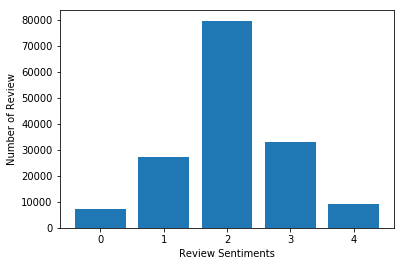

In [99]:
# creating a bar plot
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [100]:
# checking the number of phrases belonging to each sentiment label
count_class_0, count_class_1, count_class_2, count_class_3, count_class_4 = df.Sentiment.value_counts()
df.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

On the bar plot and value counts we see that the dataset is imbalanced, with more than half of the reviews belonging to the 2nd class (i.e. being neutral). To avoid this imbalance I would undersample the second class and oversample classes 0 and 4 (negative and positive respectively).

In [101]:
# dividing by class
df_class_0 = df[df['Sentiment'] == 0]
df_class_1 = df[df['Sentiment'] == 1]
df_class_2 = df[df['Sentiment'] == 2]
df_class_3 = df[df['Sentiment'] == 3]
df_class_4 = df[df['Sentiment'] == 4]

Random undersampling:
2    32927
1    27273
Name: Sentiment, dtype: int64


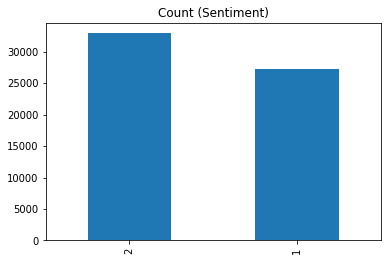

In [102]:
# random undersampling
df_class_2_under = df_class_2.sample(count_class_1)
df_test_under = pd.concat([df_class_2_under, df_class_1], axis=0)

print('Random undersampling:')
print(df_test_under.Sentiment.value_counts())

df_test_under.Sentiment.value_counts().plot(kind='bar', title='Count (Sentiment)');

Random oversampling:
0    32927
1    27273
Name: Sentiment, dtype: int64


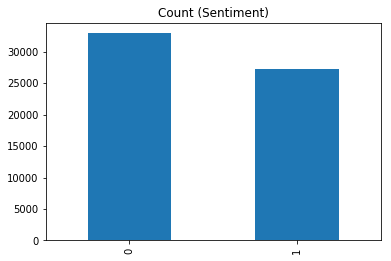

In [103]:
# random oversampling of class 0
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

print('Random oversampling:')
print(df_test_over.Sentiment.value_counts())

df_test_over.Sentiment.value_counts().plot(kind='bar', title='Count (Sentiment)');

Random oversampling:
4    32927
1    27273
Name: Sentiment, dtype: int64


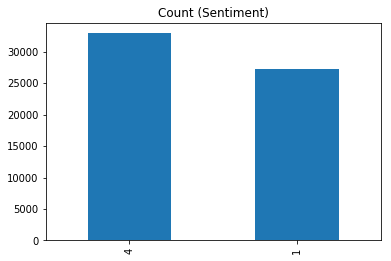

In [104]:
# random oversampling of class 4
df_class_4_over = df_class_4.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_4_over, df_class_1], axis=0)

print('Random oversampling:')
print(df_test_over.Sentiment.value_counts())

df_test_over.Sentiment.value_counts().plot(kind='bar', title='Count (Sentiment)');

In [105]:
# applying tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, stop_words='english', ngram_range = (2,2), tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

In [106]:
# splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Sentiment'], test_size=0.2, random_state=1)

In [107]:
# model generation using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6094771241830066


In [108]:
# feature generation using TF-IDF
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [109]:
# splitting the dataset into training set and test set (TF-IDF)
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df['Sentiment'], test_size=0.2, random_state=123)

In [110]:
# model generation using Multinomial Naive Bayes (TF-IDF)
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5906061771113674


Using TF-IDF features we received a classification rate of 59,06%, which cannot be considered as good accuracy. Further preprocessing or feature engineering is needed to improve the accuracy.

In [111]:
# using 5-fold cross validation with GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.64
Best parameters:  {'C': 10}
Best estimator:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


We have a model with coefficient = 1 and with 64 percent accuracy.

In [112]:
# making prediction over our test data using the trained model
lr = grid.best_estimator_
lr.fit(X_train, y_train)
lr.predict(X_test)
print("Score over test data: {:.2f}".format(lr.score(X_test, y_test)))

Score over test data: 0.65


In [113]:
# building Logistic Regression classifier
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.01: 0.5097078046905037
Accuracy for C=0.05: 0.5392477252338844
Accuracy for C=0.25: 0.5893566576957581
Accuracy for C=0.5: 0.6110149942329873
Accuracy for C=1: 0.6279956427015251


Therefore we obtain the highest accuracy with the value of C = 1.